In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

%matplotlib inline

# set up better resolution for figures
# matplotlib
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# seaborn
sb.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sb.set_context('notebook')
sb.set_style("ticks")

# for statistical test and annotation
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests

# for gene symbol query
import mygene
mg = mygene.MyGeneInfo()

# CCLE

In [2]:
# check final output files
!ls ../output_raw

1_RefDNN_CCLE.csv              2_lococv_elasticnet_GDSC.csv
1_RefDNN_CCLE_test.csv         2_lococv_randomforest_CCLE.csv
1_RefDNN_GDSC.csv              2_lococv_randomforest_GDSC.csv
1_RefDNN_GDSC_test.csv         3_lodocv_RefDNN_CCLE.csv
1_elasticnet_CCLE.csv          3_lodocv_RefDNN_GDSC.csv
1_elasticnet_GDSC.csv          3_lodocv_elasticnet_CCLE.csv
1_randomforest_CCLE.csv        3_lodocv_elasticnet_GDSC.csv
1_randomforest_GDSC.csv        3_lodocv_randomforest_CCLE.csv
2_lococv_RefDNN_CCLE.csv       3_lodocv_randomforest_GDSC.csv
2_lococv_RefDNN_GDSC.csv       4_biomarker_CCLE.csv
2_lococv_elasticnet_CCLE.csv   4_biomarker_GDSC.csv


In [3]:
CCLE_biomarkers = pd.read_csv("../output_raw/4_biomarker_CCLE.csv").rename(columns={'Unnamed: 0':'gene_id'})
CCLE_biomarkers

,gene_id,Erlotinib,Lapatinib,Nilotinib,Nutlin-3a (-),PD0325901,PHA-665752,PLX-4720,Paclitaxel,Palbociclib,Selumetinib,Sorafenib,Tanespimycin
0,0,0.005093,0.000406,-0.001190,-0.000180,0.000354,0.000020,-0.000591,0.000326,0.000174,0.000045,-0.001599,0.000225
1,1,0.004151,0.000002,0.001912,-0.000133,0.000497,0.000045,0.000725,0.000158,-0.000147,0.000111,0.004172,0.000066
2,2,0.003202,0.000216,0.000374,-0.000012,0.000189,0.000067,0.000264,-0.000043,-0.000057,0.000117,-0.002090,0.000064
3,3,-0.003235,-0.000686,0.002340,0.001140,0.000011,0.000080,-0.000002,0.000091,-0.000079,0.000069,0.001911,0.000153
4,4,0.001263,0.000128,-0.000427,-0.000203,-0.000099,-0.000017,0.000279,0.000037,-0.000041,0.000060,0.002076,0.000039
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18921,18921,0.002877,-0.000030,0.000528,-0.000203,0.000259,0.000004,-0.000495,-0.000015,0.000013,-0.000004,0.000370,-0.000003
18922,18922,-0.004841,0.000033,0.001548,-0.000195,0.000217,0.000053,-0.000446,0.000023,0.000006,0.000050,0.002435,0.000008
18923,18923,-0.001784,0.000435,-0.004647,0.000564,-0.000215,0.000158,0.000540,-0.000166,0.000117,0.000161,0.004896,0.000078
18924,18924,0.002058,0.000398,-0.000351,-0.000215,-0.000480,0.000024,0.000809,0.000031,0.000039,0.000033,-0.003959,0.000027


The `gene_id` here seems to be wrong (they are continuous from 0-18925!!).  
Maybe the expression data has the same mapping relationships, so let's check:

In [4]:
expressionFile = "../data/expression_CCLE.csv"       
CCLE_expression = pd.read_csv(expressionFile, index_col=0) 
CCLE_expression

,Gene,1321N1_CENTRAL_NERVOUS_SYSTEM,22RV1_PROSTATE,42MGBA_CENTRAL_NERVOUS_SYSTEM,5637_URINARY_TRACT,639V_URINARY_TRACT,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,769P_KIDNEY,786O_KIDNEY,8305C_THYROID,...,VMRCRCZ_KIDNEY,WM115_SKIN,WM1799_SKIN,WM2664_SKIN,WM793_SKIN,WM88_SKIN,WM983B_SKIN,YKG1_CENTRAL_NERVOUS_SYSTEM,ZR751_BREAST,ZR7530_BREAST
0,183,4.33,3.82,3.91,3.85,3.90,3.82,4.28,4.02,4.04,...,5.20,3.95,3.90,5.03,3.71,8.46,4.14,5.42,4.10,4.87
1,9383,4.35,4.08,4.49,4.62,4.20,4.59,6.81,4.38,6.54,...,7.27,4.04,4.26,4.23,4.28,5.86,4.32,8.27,7.80,7.43
2,221981,5.29,3.71,3.75,3.70,3.99,3.94,4.08,3.92,3.71,...,3.94,4.06,3.86,5.31,3.66,3.83,3.68,7.53,3.80,3.87
3,10451,4.30,7.41,5.12,5.78,4.21,9.37,10.28,4.55,4.87,...,7.91,4.29,5.64,4.35,4.44,7.53,4.66,5.76,8.79,7.56
4,100507322,3.32,3.52,3.62,3.53,3.27,4.96,3.67,3.59,3.30,...,3.62,3.53,3.39,3.24,3.36,3.42,3.43,3.37,3.91,4.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18921,84616,3.49,3.38,3.73,3.56,3.31,3.88,3.62,3.47,3.53,...,3.66,3.44,3.46,3.54,3.32,3.87,3.64,3.38,3.40,3.56
18922,4161,4.43,4.73,6.11,4.53,4.35,4.47,4.22,4.58,4.47,...,4.28,4.34,4.49,4.44,4.22,4.54,4.56,4.51,4.49,4.33
18923,286527,8.23,8.04,8.80,10.49,8.83,9.97,7.21,8.49,8.99,...,6.48,7.82,8.20,8.86,5.84,5.01,8.30,9.60,8.32,5.35
18924,10500,4.88,4.95,4.89,5.03,5.18,5.74,4.69,5.08,4.86,...,5.21,4.99,4.66,4.83,4.78,4.94,4.71,4.87,4.35,5.00


OK, let's get the `gene_id` from the expression data:

In [5]:
CCLE_biomarkers['gene_id'] = CCLE_expression['Gene']
CCLE_biomarkers

,gene_id,Erlotinib,Lapatinib,Nilotinib,Nutlin-3a (-),PD0325901,PHA-665752,PLX-4720,Paclitaxel,Palbociclib,Selumetinib,Sorafenib,Tanespimycin
0,183,0.005093,0.000406,-0.001190,-0.000180,0.000354,0.000020,-0.000591,0.000326,0.000174,0.000045,-0.001599,0.000225
1,9383,0.004151,0.000002,0.001912,-0.000133,0.000497,0.000045,0.000725,0.000158,-0.000147,0.000111,0.004172,0.000066
2,221981,0.003202,0.000216,0.000374,-0.000012,0.000189,0.000067,0.000264,-0.000043,-0.000057,0.000117,-0.002090,0.000064
3,10451,-0.003235,-0.000686,0.002340,0.001140,0.000011,0.000080,-0.000002,0.000091,-0.000079,0.000069,0.001911,0.000153
4,100507322,0.001263,0.000128,-0.000427,-0.000203,-0.000099,-0.000017,0.000279,0.000037,-0.000041,0.000060,0.002076,0.000039
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18921,84616,0.002877,-0.000030,0.000528,-0.000203,0.000259,0.000004,-0.000495,-0.000015,0.000013,-0.000004,0.000370,-0.000003
18922,4161,-0.004841,0.000033,0.001548,-0.000195,0.000217,0.000053,-0.000446,0.000023,0.000006,0.000050,0.002435,0.000008
18923,286527,-0.001784,0.000435,-0.004647,0.000564,-0.000215,0.000158,0.000540,-0.000166,0.000117,0.000161,0.004896,0.000078
18924,10500,0.002058,0.000398,-0.000351,-0.000215,-0.000480,0.000024,0.000809,0.000031,0.000039,0.000033,-0.003959,0.000027


Next, let's find out the gene symbols of the `gene_id`s using the `mygene` package.

In [6]:
ids = list(CCLE_biomarkers['gene_id'])
CCLE_symbols_dict_list = mg.querymany(ids, scopes='entrezgene', fields='symbol', species='human')
# returns a list of dictionaries

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-18926...done.
Finished.
447 input query terms found no hit:
	['100507322', '286367', '100507563', '100134361', '100507660', '84796', '100506659', '100506838', '1
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


In [7]:
# add gene symbol information
CCLE_symbols = [record['symbol'] if 'symbol' in record.keys() else record['query'] for record in CCLE_symbols_dict_list]
CCLE_biomarkers['gene_symbol'] = CCLE_symbols
CCLE_biomarkers

,gene_id,Erlotinib,Lapatinib,Nilotinib,Nutlin-3a (-),PD0325901,PHA-665752,PLX-4720,Paclitaxel,Palbociclib,Selumetinib,Sorafenib,Tanespimycin,gene_symbol
0,183,0.005093,0.000406,-0.001190,-0.000180,0.000354,0.000020,-0.000591,0.000326,0.000174,0.000045,-0.001599,0.000225,AGT
1,9383,0.004151,0.000002,0.001912,-0.000133,0.000497,0.000045,0.000725,0.000158,-0.000147,0.000111,0.004172,0.000066,TSIX
2,221981,0.003202,0.000216,0.000374,-0.000012,0.000189,0.000067,0.000264,-0.000043,-0.000057,0.000117,-0.002090,0.000064,THSD7A
3,10451,-0.003235,-0.000686,0.002340,0.001140,0.000011,0.000080,-0.000002,0.000091,-0.000079,0.000069,0.001911,0.000153,VAV3
4,100507322,0.001263,0.000128,-0.000427,-0.000203,-0.000099,-0.000017,0.000279,0.000037,-0.000041,0.000060,0.002076,0.000039,100507322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18921,84616,0.002877,-0.000030,0.000528,-0.000203,0.000259,0.000004,-0.000495,-0.000015,0.000013,-0.000004,0.000370,-0.000003,KRTAP4-4
18922,4161,-0.004841,0.000033,0.001548,-0.000195,0.000217,0.000053,-0.000446,0.000023,0.000006,0.000050,0.002435,0.000008,MC5R
18923,286527,-0.001784,0.000435,-0.004647,0.000564,-0.000215,0.000158,0.000540,-0.000166,0.000117,0.000161,0.004896,0.000078,TMSB15B
18924,10500,0.002058,0.000398,-0.000351,-0.000215,-0.000480,0.000024,0.000809,0.000031,0.000039,0.000033,-0.003959,0.000027,SEMA6C


Let's prepare a dictionary to store dataframes for each drug:

In [8]:
CCLE_drugs = list(CCLE_biomarkers)[1:-1]
CCLE_biomarkers_dict = {}
for drug in CCLE_drugs:
    df = CCLE_biomarkers[['gene_id', 'gene_symbol', drug]]
    CCLE_biomarkers_dict[drug] = df

Now it's easy to check the genes for a certain drug:

In [9]:
CCLE_biomarkers_dict['Nilotinib'].sort_values(by='Nilotinib')

,gene_id,gene_symbol,Nilotinib
13927,4691,NCL,-0.008133
8937,3015,H2AZ1,-0.007989
1690,9232,PTTG1,-0.007790
16462,7316,UBC,-0.007735
10530,9775,EIF4A3,-0.007550
...,...,...,...
2440,1938,EEF2,0.007864
8421,11222,MRPL3,0.007886
15376,2197,FAU,0.007913
7094,6194,RPS6,0.008397


Next, we want to identify the top 10 genes for each drug by the absolute value of the weights.

In [10]:
CCLE_biomarkers_top10 = {}
for drug in CCLE_drugs:
    CCLE_biomarkers_dict[drug]['key'] = -abs(CCLE_biomarkers_dict[drug][drug])  
    CCLE_biomarkers_top10[drug] = CCLE_biomarkers_dict[drug].sort_values('key').drop('key', 1).head(10).reset_index(drop=True)
    CCLE_biomarkers_dict[drug] = CCLE_biomarkers_dict[drug].drop('key', 1)

/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/2614388415.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CCLE_biomarkers_dict[drug]['key'] = -abs(CCLE_biomarkers_dict[drug][drug])
/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/2614388415.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  CCLE_biomarkers_top10[drug] = CCLE_biomarkers_dict[drug].sort_values('key').drop('key', 1).head(10).reset_index(drop=True)
/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/2614388415.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


So we can easily see the top 10 genes for a given drug, for example:

In [11]:
CCLE_biomarkers_top10['Nilotinib']

,gene_id,gene_symbol,Nilotinib
0,6229,RPS24,0.008776
1,6194,RPS6,0.008397
2,4691,NCL,-0.008133
3,3015,H2AZ1,-0.007989
4,2197,FAU,0.007913
5,11222,MRPL3,0.007886
6,1938,EEF2,0.007864
7,51602,NOP58,0.007850
8,9232,PTTG1,-0.007790
9,6135,RPL11,0.007745


Let's put together the top 10 genes for all of these drugs:

In [12]:
dfs = []
for drug in CCLE_drugs:
    dfs.append(CCLE_biomarkers_top10[drug][['gene_symbol']].rename(columns={'gene_symbol':drug}).T)
CCLE_biomarkers_top10_combined = pd.concat(dfs).rename(columns = {i: "gene_" + str(i) for i in range(10)})
#CCLE_biomarkers_top10_combined.to_csv("../analysis_output/CCLE_biomarkers_top10_genes.csv")
CCLE_biomarkers_top10_combined

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9
Erlotinib,RPS11,RPL5,TPT1,DSTN,MYL12A,TXN,PRDX1,SRP14,RTN4,ATP5PO
Lapatinib,GAPDH,RPS3,ATP5F1A,CALM2,RPL11,HSPA8,EEF2,UBC,IARS1,SNRPD2
Nilotinib,RPS24,RPS6,NCL,H2AZ1,FAU,MRPL3,EEF2,NOP58,PTTG1,RPL11
Nutlin-3a (-),TUBA1B,SLC25A5,RPL35A,UBB,ACTG1,SNRPD2,PCNA,MORF4L2,MGST1,H2AZ1
PD0325901,RPL37A,RPL38,DYNLL1,CALM2,DUSP6,RPL11,FAU,TPT1,GPRC5A,NACA
PHA-665752,TAGLN,MTCL1,TUBB2B,CSRP2,IFITM1,NNMT,GNAI1,GRB14,ALDH1A1,SPARC
PLX-4720,LDHB,SLC25A3,BEX3,YWHAG,RPS6,UBC,RPL11,CLTC,BTF3,NACA
Paclitaxel,ABCB1,MACROD2,POPDC3,PARM1,CDH13,UPK1B,CNRIP1,NPPB,SLC10A4,FOXL2
Palbociclib,MAL2,KRT19,TM4SF1,TPM1,PTGR1,PRSS23,PPIC,MYOF,FSTL1,GRB14
Selumetinib,S100B,PLP1,DCT,BASP1,MLANA,TENM2,LYZ,EDNRB,TYR,UCHL1


# GDSC

In [13]:
# check final output files
!ls ../output_raw

1_RefDNN_CCLE.csv              2_lococv_elasticnet_GDSC.csv
1_RefDNN_CCLE_test.csv         2_lococv_randomforest_CCLE.csv
1_RefDNN_GDSC.csv              2_lococv_randomforest_GDSC.csv
1_RefDNN_GDSC_test.csv         3_lodocv_RefDNN_CCLE.csv
1_elasticnet_CCLE.csv          3_lodocv_RefDNN_GDSC.csv
1_elasticnet_GDSC.csv          3_lodocv_elasticnet_CCLE.csv
1_randomforest_CCLE.csv        3_lodocv_elasticnet_GDSC.csv
1_randomforest_GDSC.csv        3_lodocv_randomforest_CCLE.csv
2_lococv_RefDNN_CCLE.csv       3_lodocv_randomforest_GDSC.csv
2_lococv_RefDNN_GDSC.csv       4_biomarker_CCLE.csv
2_lococv_elasticnet_CCLE.csv   4_biomarker_GDSC.csv


In [14]:
GDSC_biomarkers = pd.read_csv("../output_raw/4_biomarker_GDSC.csv").rename(columns={'Unnamed: 0':'gene_id'})
GDSC_biomarkers

,gene_id,(5Z)-7-Oxozeaenol,5-Fluorouracil,A-443654,A-770041,AICA Ribonucleotide,AKT inhibitor VIII,AR-42,AS601245,AS605240,...,XAV939,XMD8-85,XMD8-92,Y-39983,YK-4-279,YM201636,Z-LLNle-CHO,ZM447439,ZSTK474,Zibotentan
0,8811,-0.000034,-1.358592e-05,-0.000001,4.886690e-06,-3.598132e-06,0.000007,-0.000012,0.000003,4.672560e-07,...,0.000019,0.000007,3.846023e-06,0.000006,-0.000014,0.000012,0.000000,0.000014,0.000001,0.000037
1,83933,0.000077,-1.417706e-05,-0.000036,7.284616e-06,2.184583e-07,0.000028,-0.000037,-0.000013,-8.574874e-06,...,0.000033,0.000016,8.527070e-07,0.000003,-0.000030,0.000016,-0.000013,0.000004,-0.000037,0.000060
2,5768,0.000149,5.629977e-05,-0.000006,2.383094e-06,2.881964e-05,0.000038,-0.000038,-0.000002,4.600655e-06,...,0.000046,0.000008,2.251522e-05,0.000055,0.000016,0.000014,-0.000028,0.000039,-0.000040,0.000073
3,10893,-0.000068,8.372189e-06,-0.000021,-6.803081e-07,1.393818e-05,0.000013,-0.000035,-0.000008,-3.205296e-06,...,0.000023,0.000010,1.354664e-05,0.000018,-0.000024,0.000022,-0.000013,0.000010,-0.000021,0.000040
4,197257,0.000025,-2.322524e-06,-0.000014,-2.182308e-06,1.075885e-05,-0.000009,-0.000024,-0.000007,-3.562702e-06,...,0.000029,0.000003,1.053608e-05,0.000026,-0.000017,-0.000002,-0.000013,0.000014,-0.000013,0.000042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17775,1870,0.000037,-6.187992e-05,0.000026,2.043899e-05,-3.491473e-05,-0.000041,0.000028,0.000022,2.466157e-06,...,0.000029,-0.000004,-8.502918e-06,-0.000051,-0.000019,-0.000059,0.000036,-0.000012,0.000044,0.000044
17776,8795,-0.000089,-9.361319e-07,-0.000008,-3.504360e-06,2.966574e-05,0.000035,-0.000004,-0.000015,-5.680210e-06,...,0.000024,0.000007,2.600914e-05,0.000029,0.000002,0.000056,-0.000009,0.000014,-0.000028,0.000059
17777,8533,-0.000246,-1.118478e-05,-0.000004,7.628621e-06,3.506261e-06,0.000026,-0.000010,0.000003,5.700129e-06,...,0.000048,0.000014,2.149635e-05,0.000018,-0.000016,-0.000127,0.000010,0.000011,-0.000017,0.000097
17778,2651,0.000078,1.249550e-05,0.000026,1.000432e-05,1.187974e-05,0.000027,0.000014,0.000020,2.033064e-05,...,0.000020,0.000014,1.382429e-05,0.000028,0.000031,0.000032,0.000009,0.000024,0.000021,0.000043


These `gene_id`s looks right, but let's double check the gene ids in the expression file:

In [15]:
expressionFile = "../data/expression_GDSC.csv"       
GDSC_expression = pd.read_csv(expressionFile, index_col=0) 
GDSC_expression

,1240121,1240122,1240123,1240124,1240125,1240127,1240128,1240129,1240130,1240131,...,949175,949176,949177,949178,949179,971773,971774,971777,998184,998189
8811,3.47,3.48,3.05,3.20,3.57,3.35,2.93,3.17,3.21,3.19,...,3.50,3.07,2.92,3.06,3.14,3.33,3.80,3.22,3.18,3.11
83933,5.30,5.51,3.50,3.77,5.10,6.70,4.99,4.97,4.64,6.13,...,6.43,5.42,5.34,4.74,5.09,5.13,4.88,5.88,3.61,5.18
5768,7.56,7.14,6.20,7.53,6.97,8.19,8.99,7.37,7.40,7.73,...,4.82,5.35,5.09,4.61,6.20,4.91,4.97,6.20,5.53,7.28
10893,3.51,3.24,3.35,3.43,3.56,3.45,3.27,3.59,3.53,3.59,...,3.95,3.35,3.95,3.75,3.72,3.27,3.29,3.40,3.49,3.39
197257,3.68,3.65,4.97,3.23,3.31,3.29,2.86,3.67,3.09,3.28,...,3.67,3.28,3.09,3.72,3.98,3.16,3.32,3.14,3.24,4.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,3.47,5.11,5.51,4.15,3.67,6.64,3.50,4.01,4.08,3.37,...,5.73,3.74,5.52,5.64,4.26,3.80,5.87,4.30,5.38,4.50
8795,5.01,4.56,4.85,5.75,5.69,6.10,5.35,4.65,7.59,5.44,...,4.56,5.19,3.68,4.40,5.57,5.64,5.23,5.50,4.69,6.41
8533,8.77,11.00,8.30,8.90,8.87,9.85,9.47,9.22,7.56,8.27,...,9.67,8.21,10.25,9.12,9.14,10.05,9.45,9.42,9.95,9.42
2651,3.39,3.45,3.19,3.29,5.43,3.28,4.11,4.08,4.18,4.23,...,3.32,4.54,3.28,3.22,3.23,3.51,3.43,3.33,3.21,3.17


We can confirm that the gene IDs are in the same order!
Next, let's also get the gene symbols:

In [16]:
ids = list(GDSC_biomarkers['gene_id'])
GDSC_symbols_dict_list = mg.querymany(ids, scopes='entrezgene', fields='symbol', species='human')
# returns a list of dictionaries

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-17780...done.
Finished.
141 input query terms found no hit:
	['399491', '283155', '414308', '145757', '100294398', '728936', '100293149', '5505', '100130751', '1
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


Add gene symbols to the dataframe:

In [17]:
GDSC_symbols = [record['symbol'] if 'symbol' in record.keys() else record['query'] for record in GDSC_symbols_dict_list]
GDSC_gene_id2symbol = dict(zip(ids, GDSC_symbols))
GDSC_gene_symbol2id = dict(zip(GDSC_symbols, ids))
GDSC_biomarkers['gene_symbol'] = GDSC_symbols
GDSC_biomarkers

,gene_id,(5Z)-7-Oxozeaenol,5-Fluorouracil,A-443654,A-770041,AICA Ribonucleotide,AKT inhibitor VIII,AR-42,AS601245,AS605240,...,XMD8-85,XMD8-92,Y-39983,YK-4-279,YM201636,Z-LLNle-CHO,ZM447439,ZSTK474,Zibotentan,gene_symbol
0,8811,-0.000034,-1.358592e-05,-0.000001,4.886690e-06,-3.598132e-06,0.000007,-0.000012,0.000003,4.672560e-07,...,0.000007,3.846023e-06,0.000006,-0.000014,0.000012,0.000000,0.000014,0.000001,0.000037,GALR2
1,83933,0.000077,-1.417706e-05,-0.000036,7.284616e-06,2.184583e-07,0.000028,-0.000037,-0.000013,-8.574874e-06,...,0.000016,8.527070e-07,0.000003,-0.000030,0.000016,-0.000013,0.000004,-0.000037,0.000060,HDAC10
2,5768,0.000149,5.629977e-05,-0.000006,2.383094e-06,2.881964e-05,0.000038,-0.000038,-0.000002,4.600655e-06,...,0.000008,2.251522e-05,0.000055,0.000016,0.000014,-0.000028,0.000039,-0.000040,0.000073,QSOX1
3,10893,-0.000068,8.372189e-06,-0.000021,-6.803081e-07,1.393818e-05,0.000013,-0.000035,-0.000008,-3.205296e-06,...,0.000010,1.354664e-05,0.000018,-0.000024,0.000022,-0.000013,0.000010,-0.000021,0.000040,MMP24
4,197257,0.000025,-2.322524e-06,-0.000014,-2.182308e-06,1.075885e-05,-0.000009,-0.000024,-0.000007,-3.562702e-06,...,0.000003,1.053608e-05,0.000026,-0.000017,-0.000002,-0.000013,0.000014,-0.000013,0.000042,LDHD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17775,1870,0.000037,-6.187992e-05,0.000026,2.043899e-05,-3.491473e-05,-0.000041,0.000028,0.000022,2.466157e-06,...,-0.000004,-8.502918e-06,-0.000051,-0.000019,-0.000059,0.000036,-0.000012,0.000044,0.000044,E2F2
17776,8795,-0.000089,-9.361319e-07,-0.000008,-3.504360e-06,2.966574e-05,0.000035,-0.000004,-0.000015,-5.680210e-06,...,0.000007,2.600914e-05,0.000029,0.000002,0.000056,-0.000009,0.000014,-0.000028,0.000059,TNFRSF10B
17777,8533,-0.000246,-1.118478e-05,-0.000004,7.628621e-06,3.506261e-06,0.000026,-0.000010,0.000003,5.700129e-06,...,0.000014,2.149635e-05,0.000018,-0.000016,-0.000127,0.000010,0.000011,-0.000017,0.000097,COPS3
17778,2651,0.000078,1.249550e-05,0.000026,1.000432e-05,1.187974e-05,0.000027,0.000014,0.000020,2.033064e-05,...,0.000014,1.382429e-05,0.000028,0.000031,0.000032,0.000009,0.000024,0.000021,0.000043,GCNT2


Prepare a dictionary of dataframes:

In [18]:
GDSC_drugs = list(GDSC_biomarkers)[1:-1]
GDSC_biomarkers_dict = {}
for drug in GDSC_drugs:
    df = GDSC_biomarkers[['gene_id', 'gene_symbol', drug]]
    GDSC_biomarkers_dict[drug] = df

Example of checking the souted gene weights for a certain drug:

In [19]:
GDSC_biomarkers_dict['Nilotinib'].sort_values(by='Nilotinib')

,gene_id,gene_symbol,Nilotinib
11580,9535,GMFG,-0.000072
1902,963,CD53,-0.000059
11168,3937,LCP2,-0.000058
9140,64092,SAMSN1,-0.000055
17399,400668,PRSS57,-0.000054
...,...,...,...
3824,1266,CNN3,0.000135
15974,11098,PRSS23,0.000139
10105,4071,TM4SF1,0.000142
14621,3491,CCN1,0.000143


Again, let's extract the top 10 genes according to the absolute values of the weights:

In [20]:
GDSC_biomarkers_top10 = {}
for drug in GDSC_drugs:
    GDSC_biomarkers_dict[drug]['key'] = -abs(GDSC_biomarkers_dict[drug][drug])  
    GDSC_biomarkers_top10[drug] = GDSC_biomarkers_dict[drug].sort_values('key').drop('key', 1).head(10).reset_index(drop=True)
    GDSC_biomarkers_dict[drug] = GDSC_biomarkers_dict[drug].drop('key', 1)

/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDSC_biomarkers_dict[drug]['key'] = -abs(GDSC_biomarkers_dict[drug][drug])
/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  GDSC_biomarkers_top10[drug] = GDSC_biomarkers_dict[drug].sort_values('key').drop('key', 1).head(10).reset_index(drop=True)
/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDSC_biomarkers_dict[drug]['key'] = -abs(GDSC_biomarkers_dict[drug][drug])
/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  GDSC_biomarkers_top10[drug] = GDSC_biomarkers_dict[drug].sort_values('key').drop('key', 1).head(10).reset_index(drop=True)
/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDSC_biomarkers_dict[drug]['key'] = -abs(GDSC_biomarkers_dict[drug][drug])
/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  GDSC_biomarkers_top10[drug] = GDSC_biomarkers_dict[drug].sort_values('key').drop('key', 1).head(10).reset_index(drop=True)
/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDSC_biomarkers_dict[drug]['key'] = -abs(GDSC_biomarkers_dict[drug][drug])
/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  GDSC_biomarkers_top10[drug] = GDSC_biomarkers_dict[drug].sort_values('key').drop('key', 1).head(10).reset_index(drop=True)
/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDSC_biomarkers_dict[drug]['key'] = -abs(GDSC_biomarkers_dict[drug][drug])
/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  GDSC_biomarkers_top10[drug] = GDSC_biomarkers_dict[drug].sort_values('key').drop('key', 1).head(10).reset_index(drop=True)
/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDSC_biomarkers_dict[drug]['key'] = -abs(GDSC_biomarkers_dict[drug][drug])
/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  GDSC_biomarkers_top10[drug] = GDSC_biomarkers_dict[drug].sort_values('key').drop('key', 1).head(10).reset_index(drop=True)
/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  GDSC_biomarkers_top10[drug] = GDSC_biomarkers_dict[drug].sort_values('key').drop('key', 1).head(10).reset_index(drop=True)
/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  GDSC_biomarkers_dict[drug] = GDSC_biomarkers_dict[drug].drop('key', 1)
/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GD

/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  GDSC_biomarkers_top10[drug] = GDSC_biomarkers_dict[drug].sort_values('key').drop('key', 1).head(10).reset_index(drop=True)
/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  GDSC_biomarkers_dict[drug] = GDSC_biomarkers_dict[drug].drop('key', 1)
/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GD

/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  GDSC_biomarkers_top10[drug] = GDSC_biomarkers_dict[drug].sort_values('key').drop('key', 1).head(10).reset_index(drop=True)
/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  GDSC_biomarkers_dict[drug] = GDSC_biomarkers_dict[drug].drop('key', 1)
/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GD

/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDSC_biomarkers_dict[drug]['key'] = -abs(GDSC_biomarkers_dict[drug][drug])
/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  GDSC_biomarkers_top10[drug] = GDSC_biomarkers_dict[drug].sort_values('key').drop('key', 1).head(10).reset_index(drop=True)
/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDSC_biomarkers_dict[drug]['key'] = -abs(GDSC_biomarkers_dict[drug][drug])
/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  GDSC_biomarkers_top10[drug] = GDSC_biomarkers_dict[drug].sort_values('key').drop('key', 1).head(10).reset_index(drop=True)
/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDSC_biomarkers_dict[drug]['key'] = -abs(GDSC_biomarkers_dict[drug][drug])
/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  GDSC_biomarkers_top10[drug] = GDSC_biomarkers_dict[drug].sort_values('key').drop('key', 1).head(10).reset_index(drop=True)
/var/folders/6t/dfz64ccs4vd95l2k0ff02638v9nvwr/T/ipykernel_80230/1804942134.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


In [21]:
dfs = []
for drug in GDSC_drugs:
    dfs.append(GDSC_biomarkers_top10[drug][['gene_symbol']].rename(columns={'gene_symbol':drug}).T)
GDSC_biomarkers_top10_combined = pd.concat(dfs).rename(columns = {i: "gene_" + str(i) for i in range(10)})
#GDSC_biomarkers_top10_combined.to_csv("../analysis_output/GDSC_biomarkers_top10_genes.csv")
GDSC_biomarkers_top10_combined

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9
(5Z)-7-Oxozeaenol,RPS15A,RACK1,B2M,AKR1C3,ACTG1,DYNLL1,UBC,LOC100287430,RPL27,SNRPD2
5-Fluorouracil,GMFG,CD53,LAPTM5,IRAG2,CCN1,NNMT,CCN2,P2RY8,ARHGAP15,RHOH
A-443654,MAGEB2,TMPRSS15,HRCT1,IRX3,LRRC32,CAPSL,IFI6,SYTL2,IL7R,SPARCL1
A-770041,TFPI,CCN1,BEX1,SNAP25,FAXC,CALCB,INSM1,GPR87,IL7R,DNER
AICA Ribonucleotide,CD53,LAPTM5,CORO1A,GMFG,NNMT,ARHGAP15,P2RY8,NCF4,ARHGDIB,LCP1
...,...,...,...,...,...,...,...,...,...,...
YM201636,S100A16,TPD52L1,KRT19,MGST1,TACSTD2,SLC2A11,GAPDH,ATP5F1C,RPLP1,TGFBI
Z-LLNle-CHO,SYTL2,IFI6,MT1E,GPNMB,HSPA2,MAGEA4,IRX3,IFI27,HRCT1,MAGEB2
ZM447439,MAL2,C19orf33,KRT8,S100A16,LGALS3,KRT19,TSPAN8,PRSS23,TPD52L1,GNG12
ZSTK474,MAGEB2,IRX3,TMPRSS15,HRCT1,IL7R,MT1E,TFPI,JAG1,IFI6,MFAP5


# Prepare figure for the report

In [22]:
responseFile = "../data/response_GDSC.csv"
GDSC_response = pd.read_csv(responseFile)  
GDSC_response['Label'] = GDSC_response['Label'].str.replace('Resistance', 'Resistant').replace('Sensitivity', 'Sensitive')
GDSC_response

,Drug,Cell,Label
0,Erlotinib,683665,Resistant
1,Erlotinib,684055,Resistant
2,Erlotinib,684057,Resistant
3,Erlotinib,684059,Resistant
4,Erlotinib,684062,Resistant
...,...,...,...
190031,PFI-3,1659823,Resistant
190032,PFI-3,1660034,Resistant
190033,PFI-3,1660035,Resistant
190034,PFI-3,1660036,Resistant


For a certain drug, we can organize the gene expression of its top 10 genes for the cell lines together with the resistance labels.

In [23]:
drug = 'GNF-2'
response_temp = GDSC_response[GDSC_response['Drug']==drug].reset_index(drop=True).drop(columns='Drug')
response_temp['Cell'] = response_temp['Cell'].apply(lambda x: str(x))
merged = response_temp

for ind, row in GDSC_biomarkers_top10[drug].iterrows():
    expression_temp = GDSC_expression.loc[[int(row['gene_id']),]].T.reset_index().rename(columns = {'index':'Cell', int(row['gene_id']): row['gene_symbol']})
    merged = pd.merge(merged, expression_temp, how='left', on='Cell')
merged = merged.drop(columns='Cell')
merged

,Label,CNN3,SGCE,BEX3,BTG3,UBE2C,CYB5A,NQO1,GNAS,MGST3,UBC
0,Resistant,2.84,7.32,5.95,9.63,10.94,7.38,7.91,11.89,8.18,12.91
1,Resistant,9.49,7.73,12.86,8.93,10.86,7.12,7.24,12.28,9.98,12.78
2,Resistant,9.81,8.29,12.22,10.12,11.14,7.71,4.82,12.05,11.66,13.08
3,Resistant,9.96,8.11,12.50,9.19,9.49,9.09,9.40,11.92,9.57,12.77
4,Resistant,10.09,5.53,12.81,10.51,11.15,7.72,6.90,12.19,11.19,12.75
...,...,...,...,...,...,...,...,...,...,...,...
391,Resistant,3.11,4.64,3.50,7.69,12.21,7.14,5.01,11.77,9.05,12.88
392,Resistant,3.06,8.41,3.19,8.06,9.83,9.42,7.42,11.58,12.39,13.03
393,Resistant,3.44,4.40,3.31,9.26,7.36,4.21,10.03,11.42,11.02,13.23
394,Resistant,3.07,8.72,3.35,6.87,11.10,3.65,7.98,11.53,9.04,12.98


Reshape from wide to long:

In [24]:
merged_melted = pd.melt(merged, id_vars='Label', value_vars=list(merged)[1:], var_name='gene')
merged_melted

,Label,gene,value
0,Resistant,CNN3,2.84
1,Resistant,CNN3,9.49
2,Resistant,CNN3,9.81
3,Resistant,CNN3,9.96
4,Resistant,CNN3,10.09
...,...,...,...
3955,Resistant,UBC,12.88
3956,Resistant,UBC,13.03
3957,Resistant,UBC,13.23
3958,Resistant,UBC,12.98


### Statistical test

In [25]:
merged_resistant = merged[merged['Label']=='Resistant']
merged_sensitive = merged[merged['Label']=='Sensitive']

p_values_df_GDSC = pd.DataFrame()
p_values_df_GDSC['gene'] = list(merged)[1:]

p_values = []
for gene in list(merged)[1:]:
    p_values.append(stats.mannwhitneyu(list(merged_resistant[gene]), list(merged_sensitive[gene]))[1])
p_values_df_GDSC['p-value'] = p_values

p_adjusted = multipletests(p_values, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
p_values_df_GDSC['p-adjusted'] = p_adjusted

p_labels = ['**' if p<0.01 else('*' if p<0.05 else 'ns') for p in p_adjusted]
p_values_df_GDSC['p-labels'] = p_labels

gene_labels = p_values_df_GDSC.apply(lambda x: x['gene'] + (x['p-labels'] if '*' in x['p-labels'] else ''), axis=1)
p_values_df_GDSC['gene_label'] = gene_labels

p_values_df_GDSC

,gene,p-value,p-adjusted,p-labels,gene_label
0,CNN3,0.040247,0.100617,ns,CNN3
1,SGCE,0.000847,0.008467,**,SGCE**
2,BEX3,0.008114,0.040569,*,BEX3*
3,BTG3,0.378808,0.420897,ns,BTG3
4,UBE2C,0.447395,0.447395,ns,UBE2C
5,CYB5A,0.361626,0.420897,ns,CYB5A
6,NQO1,0.064556,0.129113,ns,NQO1
7,GNAS,0.138015,0.197165,ns,GNAS
8,MGST3,0.021913,0.073042,ns,MGST3
9,UBC,0.132138,0.197165,ns,UBC


### Visualization:

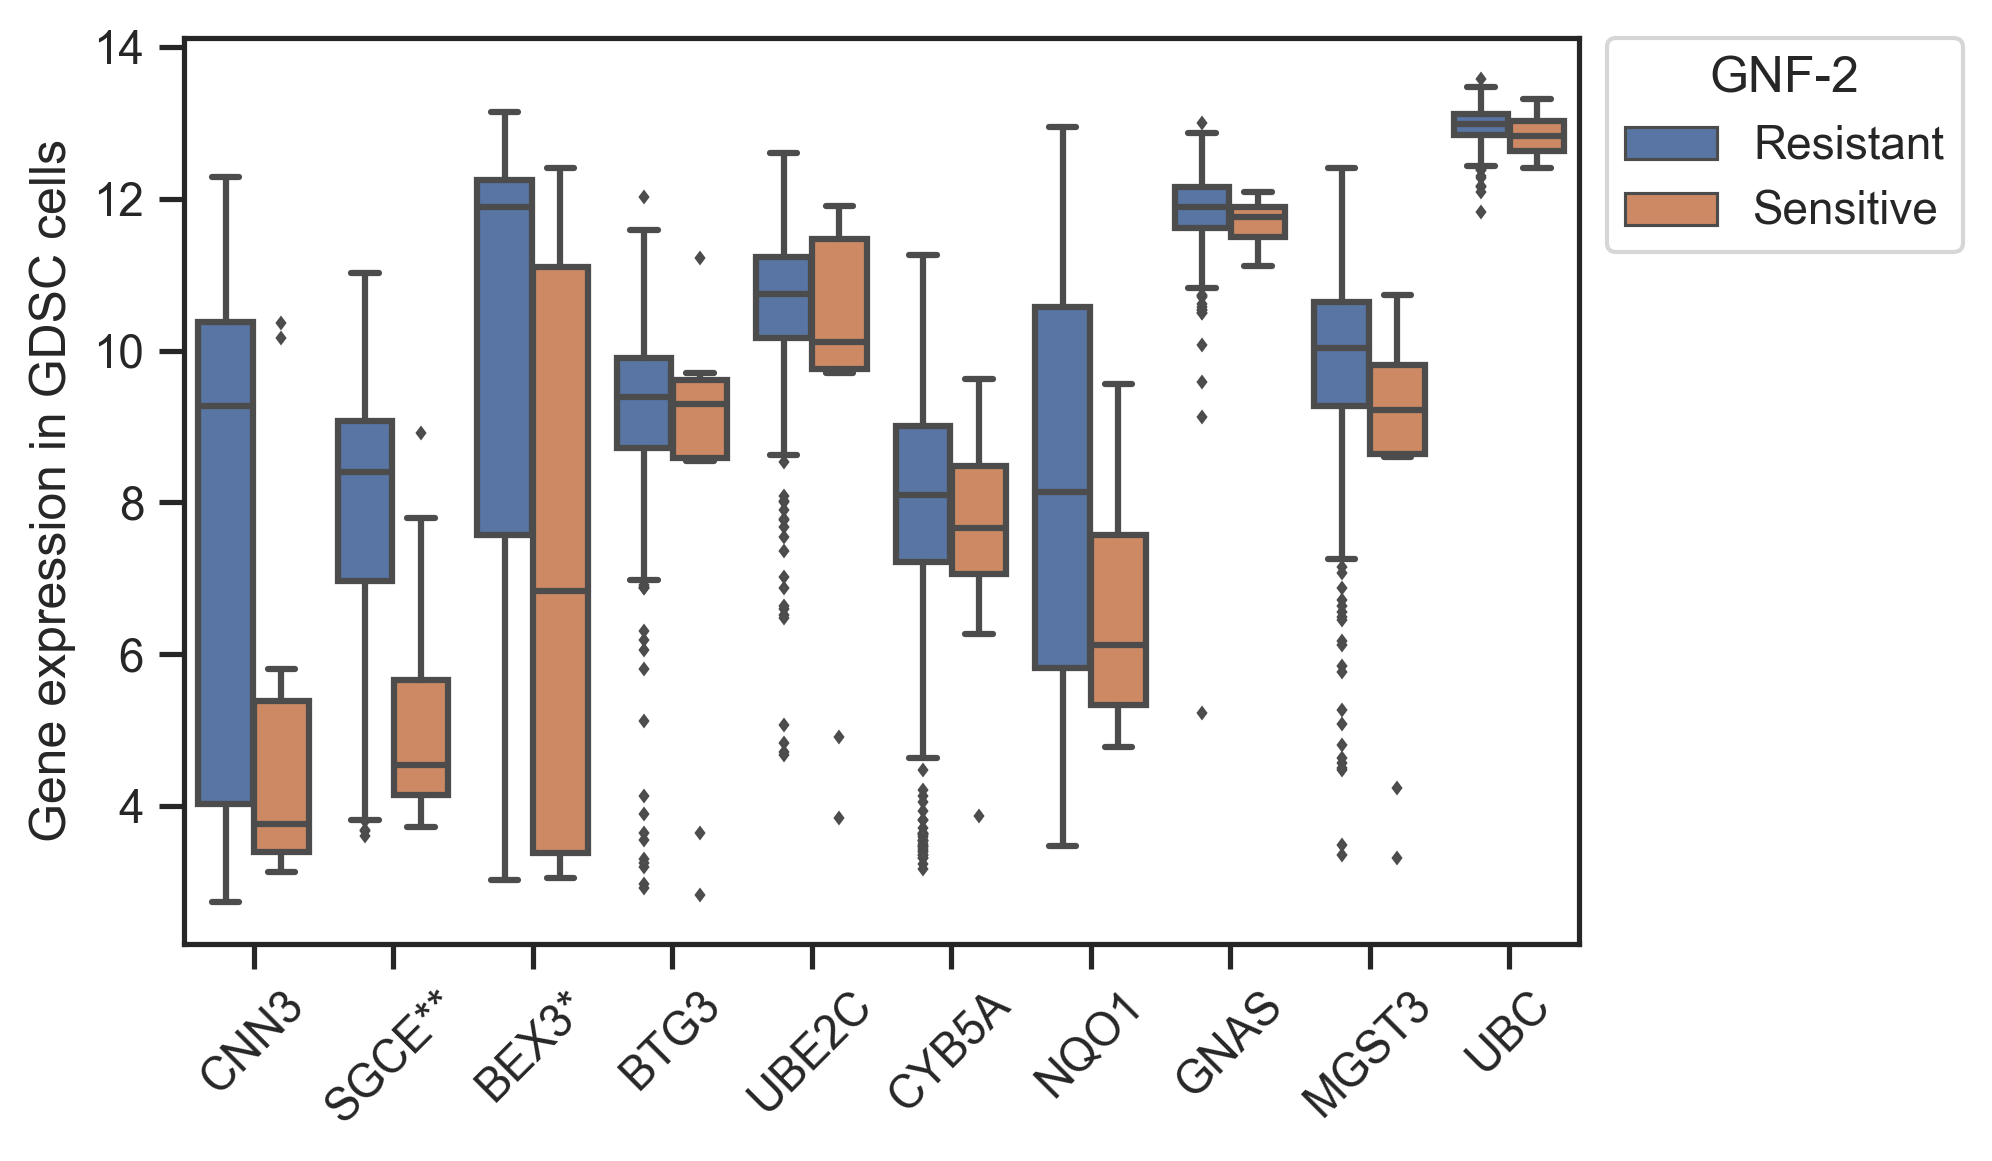

In [26]:
sb.boxplot(data=merged_melted, hue='Label', y='value',x='gene', flierprops = dict(markerfacecolor = '0.50', markersize = 1.5));
plt.xlabel('')
plt.xticks([i for i in range(10)],list(gene_labels));
plt.xticks(rotation=45)
plt.ylabel(f'Gene expression in GDSC cells');
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title=drug);

# Put together a plotting function

In [27]:
def plot_top_10_genes(drug, panel_label=None):
    # extract gene expression for the top genes for a certain drug
    response_temp = GDSC_response[GDSC_response['Drug']==drug].reset_index(drop=True).drop(columns='Drug')
    response_temp['Cell'] = response_temp['Cell'].apply(lambda x: str(x))
    merged = response_temp
    for ind, row in GDSC_biomarkers_top10[drug].iterrows():
        expression_temp = GDSC_expression.loc[[int(row['gene_id']),]].T.reset_index().rename(
            columns = {'index':'Cell', int(row['gene_id']): row['gene_symbol']})
        merged = pd.merge(merged, expression_temp, how='left', on='Cell')
    merged = merged.drop(columns='Cell')
    merged_melted = pd.melt(merged, id_vars='Label', value_vars=list(merged)[1:], var_name='gene')

    # statistical test
    p_values_df_GDSC = pd.DataFrame()
    p_values_df_GDSC['gene'] = list(merged)[1:]
    merged_resistant = merged[merged['Label']=='Resistant']
    merged_sensitive = merged[merged['Label']=='Sensitive']
    p_values = []
    for gene in list(merged)[1:]:
        p_values.append(stats.mannwhitneyu(list(merged_resistant[gene]), list(merged_sensitive[gene]))[1])
    p_values_df_GDSC['p-value'] = p_values
    p_adjusted = multipletests(p_values, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
    p_values_df_GDSC['p-adjusted'] = p_adjusted
    p_labels = ['**' if p<0.01 else('*' if p < 0.05 else 'ns') for p in p_adjusted]
    p_values_df_GDSC['p-labels'] = p_labels
    gene_labels = p_values_df_GDSC.apply(lambda x: x['gene'] + (x['p-labels'] if '*' in x['p-labels'] else ''),axis=1)
    p_values_df_GDSC['gene_label'] = gene_labels

    # plot
    sb.boxplot(data=merged_melted, hue='Label', y='value',x='gene', 
               flierprops = dict(markerfacecolor = '0.50', markersize = 1.5));
    plt.xlabel('')
    plt.xticks([i for i in range(10)],list(gene_labels));
    plt.xticks(rotation=45)
    plt.ylabel(f'Gene expression in GDSC cells');
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title=drug);
    
    if panel_label:
        plt.annotate(panel_label, weight='bold', xy=(0, 1), xycoords='axes fraction', xytext=(-90, 0), 
                     textcoords='offset points', horizontalalignment='left', verticalalignment='top')

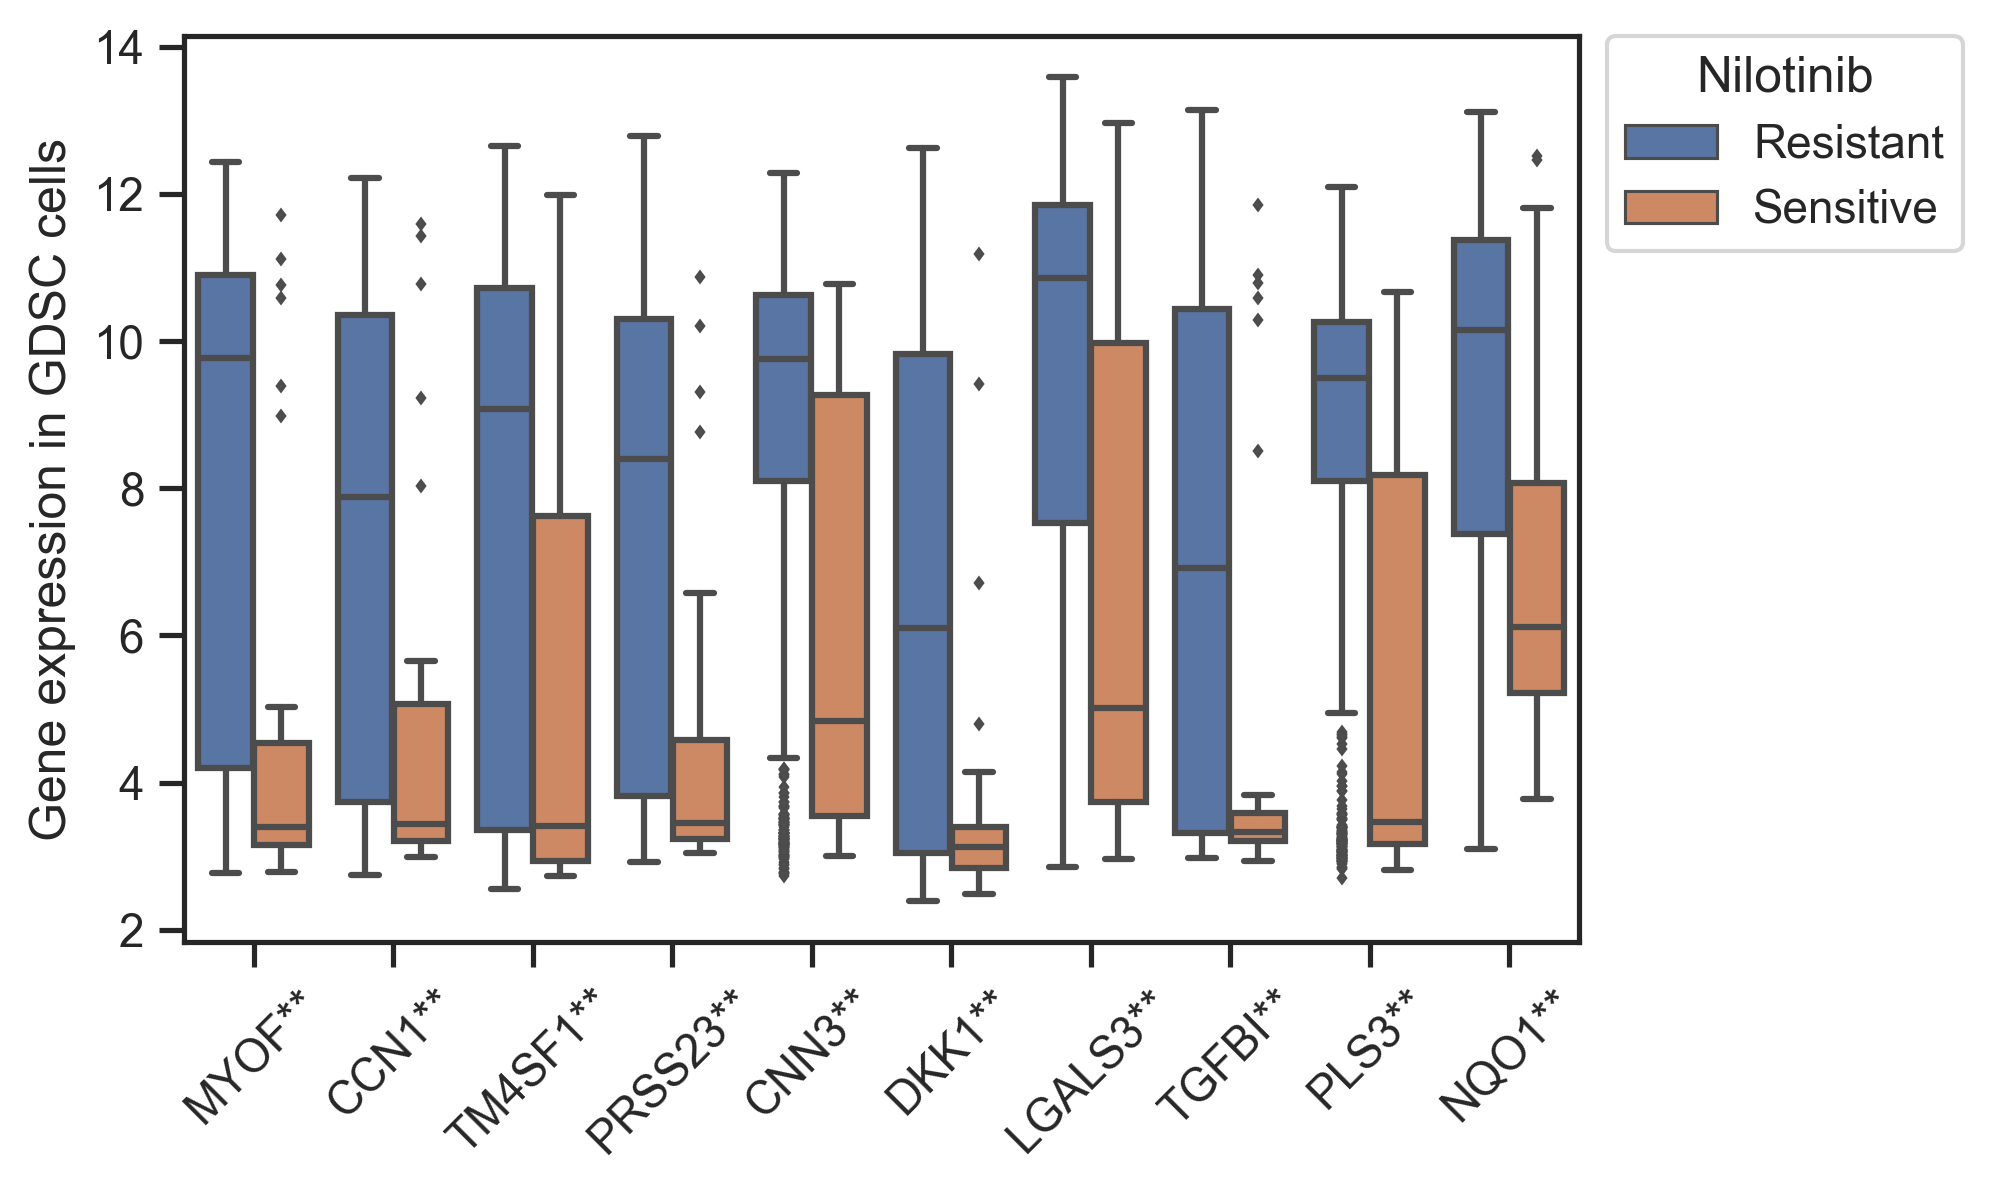

In [28]:
plot_top_10_genes('Nilotinib')

## Validation in CCLE data

Note: there'e some problem with the IC50 values in CCLE data.

In [29]:
expressionFile = "../data/expression_CCLE.csv"       
CCLE_expression = pd.read_csv(expressionFile, index_col=0) 
CCLE_expression

,Gene,1321N1_CENTRAL_NERVOUS_SYSTEM,22RV1_PROSTATE,42MGBA_CENTRAL_NERVOUS_SYSTEM,5637_URINARY_TRACT,639V_URINARY_TRACT,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,769P_KIDNEY,786O_KIDNEY,8305C_THYROID,...,VMRCRCZ_KIDNEY,WM115_SKIN,WM1799_SKIN,WM2664_SKIN,WM793_SKIN,WM88_SKIN,WM983B_SKIN,YKG1_CENTRAL_NERVOUS_SYSTEM,ZR751_BREAST,ZR7530_BREAST
0,183,4.33,3.82,3.91,3.85,3.90,3.82,4.28,4.02,4.04,...,5.20,3.95,3.90,5.03,3.71,8.46,4.14,5.42,4.10,4.87
1,9383,4.35,4.08,4.49,4.62,4.20,4.59,6.81,4.38,6.54,...,7.27,4.04,4.26,4.23,4.28,5.86,4.32,8.27,7.80,7.43
2,221981,5.29,3.71,3.75,3.70,3.99,3.94,4.08,3.92,3.71,...,3.94,4.06,3.86,5.31,3.66,3.83,3.68,7.53,3.80,3.87
3,10451,4.30,7.41,5.12,5.78,4.21,9.37,10.28,4.55,4.87,...,7.91,4.29,5.64,4.35,4.44,7.53,4.66,5.76,8.79,7.56
4,100507322,3.32,3.52,3.62,3.53,3.27,4.96,3.67,3.59,3.30,...,3.62,3.53,3.39,3.24,3.36,3.42,3.43,3.37,3.91,4.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18921,84616,3.49,3.38,3.73,3.56,3.31,3.88,3.62,3.47,3.53,...,3.66,3.44,3.46,3.54,3.32,3.87,3.64,3.38,3.40,3.56
18922,4161,4.43,4.73,6.11,4.53,4.35,4.47,4.22,4.58,4.47,...,4.28,4.34,4.49,4.44,4.22,4.54,4.56,4.51,4.49,4.33
18923,286527,8.23,8.04,8.80,10.49,8.83,9.97,7.21,8.49,8.99,...,6.48,7.82,8.20,8.86,5.84,5.01,8.30,9.60,8.32,5.35
18924,10500,4.88,4.95,4.89,5.03,5.18,5.74,4.69,5.08,4.86,...,5.21,4.99,4.66,4.83,4.78,4.94,4.71,4.87,4.35,5.00


In [30]:
responseFile = "../data/response_CCLE.csv"
CCLE_response = pd.read_csv(responseFile)  
CCLE_response['Label'] = CCLE_response['Label'].str.replace('Resistance', 'Resistant').replace('Sensitivity', 'Sensitive')
CCLE_response

,Drug,Cell,Label,LN_IC50
0,Nilotinib,22RV1_PROSTATE,Resistant,2.079442
1,Nilotinib,5637_URINARY_TRACT,Resistant,2.011612
2,Nilotinib,639V_URINARY_TRACT,Resistant,2.079442
3,Nilotinib,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Sensitive,0.647331
4,Nilotinib,769P_KIDNEY,Resistant,2.079442
...,...,...,...,...
5719,Erlotinib,WM88_SKIN,Resistant,2.079442
5720,Erlotinib,WM983B_SKIN,Resistant,2.079442
5721,Erlotinib,YKG1_CENTRAL_NERVOUS_SYSTEM,Resistant,2.079442
5722,Erlotinib,ZR751_BREAST,Resistant,2.079442


In [31]:
drug = 'Nilotinib'
response_temp = CCLE_response[CCLE_response['Drug']==drug].reset_index(drop=True).drop(columns='Drug')
merged = response_temp
genes = list(GDSC_biomarkers_top10['Nilotinib']['gene_symbol'])
for gene in genes:
    gene_id = GDSC_gene_symbol2id[gene]
    expression_temp = CCLE_expression[CCLE_expression['Gene']==gene_id].reset_index(drop=True).drop(columns='Gene').T \
        .reset_index().rename(columns = {'index':'Cell', 0: gene})
    merged = pd.merge(merged, expression_temp, how='left', on='Cell')
merged = merged.drop(columns=['Cell', 'LN_IC50'])
merged

,Label,MYOF,CCN1,TM4SF1,PRSS23,CNN3,DKK1,LGALS3,TGFBI,PLS3,NQO1
0,Resistant,6.37,5.66,4.03,10.99,9.32,10.93,4.68,4.80,12.12,8.90
1,Resistant,10.93,10.22,11.57,10.02,11.43,10.67,12.50,13.12,12.17,10.55
2,Resistant,11.44,12.10,6.84,10.06,11.28,13.45,9.02,6.67,10.58,8.97
3,Sensitive,4.36,4.56,4.19,5.01,9.86,8.13,4.39,4.76,13.32,6.66
4,Resistant,11.86,11.52,12.01,10.87,10.88,4.22,10.29,12.41,12.31,12.08
...,...,...,...,...,...,...,...,...,...,...,...
402,Resistant,12.14,11.96,10.89,11.35,11.73,12.94,11.77,13.30,11.67,12.91
403,Resistant,10.35,8.14,9.98,11.32,10.56,4.70,14.04,13.08,11.40,12.78
404,Resistant,10.65,9.76,10.61,10.22,12.60,12.03,13.01,13.69,12.01,12.77
405,Resistant,9.61,7.60,12.66,8.61,10.58,13.59,12.27,13.89,13.01,10.91


In [32]:
merged_melted = pd.melt(merged, id_vars='Label', value_vars=list(merged)[1:], var_name='gene')
merged_melted

,Label,gene,value
0,Resistant,MYOF,6.37
1,Resistant,MYOF,10.93
2,Resistant,MYOF,11.44
3,Sensitive,MYOF,4.36
4,Resistant,MYOF,11.86
...,...,...,...
4065,Resistant,NQO1,12.91
4066,Resistant,NQO1,12.78
4067,Resistant,NQO1,12.77
4068,Resistant,NQO1,10.91


### statistical test

In [33]:
p_values_df_CCLE = pd.DataFrame()
p_values_df_CCLE['gene'] = list(merged)[1:]
merged_resistant = merged[merged['Label']=='Resistant']
merged_sensitive = merged[merged['Label']=='Sensitive']
p_values = []
for gene in list(merged)[1:]:
    p_values.append(stats.mannwhitneyu(list(merged_resistant[gene]), list(merged_sensitive[gene]))[1])
p_values_df_CCLE['p-value'] = p_values
p_adjusted = multipletests(p_values, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
p_values_df_CCLE['p-adjusted'] = p_adjusted
p_labels = ['**' if p<0.01 else('*' if p < 0.05 else 'ns') for p in p_adjusted]
p_values_df_CCLE['p-labels'] = p_labels
gene_labels = p_values_df_CCLE.apply(lambda x: x['gene'] + (x['p-labels'] if '*' in x['p-labels'] else ''),axis=1)
p_values_df_CCLE['gene_label'] = gene_labels
p_values_df_CCLE

,gene,p-value,p-adjusted,p-labels,gene_label
0,MYOF,0.012621,0.029532,*,MYOF*
1,CCN1,0.000196,0.001961,**,CCN1**
2,TM4SF1,0.102155,0.102155,ns,TM4SF1
3,PRSS23,0.020672,0.029532,*,PRSS23*
4,CNN3,0.002169,0.010844,*,CNN3*
5,DKK1,0.043510,0.054388,ns,DKK1
6,LGALS3,0.059353,0.065948,ns,LGALS3
7,TGFBI,0.017482,0.029532,*,TGFBI*
8,PLS3,0.005099,0.016997,*,PLS3*
9,NQO1,0.018888,0.029532,*,NQO1*


# Prepare the Final Figure

In [34]:
# statistical test
def get_p_value_labels(merged):    
    p_values_df = pd.DataFrame()
    p_values_df['gene'] = list(merged)[1:]
    merged_resistant = merged[merged['Label']=='Resistant']
    merged_sensitive = merged[merged['Label']=='Sensitive']
    p_values = []
    for gene in list(merged)[1:]:
        p_values.append(stats.mannwhitneyu(list(merged_resistant[gene]), list(merged_sensitive[gene]))[1])
    p_values_df['p-value'] = p_values
    p_adjusted = multipletests(p_values, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
    p_values_df['p-adjusted'] = p_adjusted
    p_labels = ['**' if p<0.01 else('*' if p < 0.05 else 'ns') for p in p_adjusted]
    p_values_df['p-labels'] = p_labels
    gene_labels = p_values_df.apply(lambda x: x['gene'] + (x['p-labels'] if '*' in x['p-labels'] else ''),axis=1)
    return gene_labels

In [35]:
def make_plot(drug, merged_melted, gene_labels, dataset, panel_label):
    sb.boxplot(data=merged_melted, hue='Label', y='value',x='gene', 
               flierprops = dict(markerfacecolor = '0.50', markersize = 1.5));
    plt.xlabel('')
    plt.xticks([i for i in range(10)],list(gene_labels));
    plt.xticks(rotation=45)
    plt.ylabel(f'Gene Expression ({dataset})');
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title=drug);
    
    if panel_label:
        plt.annotate(panel_label, weight='bold', xy=(0, 1), xycoords='axes fraction', xytext=(-90, 0), 
                     textcoords='offset points', horizontalalignment='left', verticalalignment='top')    

In [36]:
def plot_top_10_genes(drug, panel_label=None):
    # extract gene expression for the top genes for a certain drug
    response_temp = GDSC_response[GDSC_response['Drug']==drug].reset_index(drop=True).drop(columns='Drug')
    response_temp['Cell'] = response_temp['Cell'].apply(lambda x: str(x))
    merged = response_temp
    for ind, row in GDSC_biomarkers_top10[drug].iterrows():
        expression_temp = GDSC_expression.loc[[int(row['gene_id']),]].T.reset_index().rename(
            columns = {'index':'Cell', int(row['gene_id']): row['gene_symbol']})
        merged = pd.merge(merged, expression_temp, how='left', on='Cell')
    merged = merged.drop(columns='Cell')
    merged_melted = pd.melt(merged, id_vars='Label', value_vars=list(merged)[1:], var_name='gene')

    # statistical test
    gene_labels = get_p_value_labels(merged)

    # plot
    make_plot(drug, merged_melted, gene_labels, 'GDSC', panel_label)

In [37]:
def plot_gene_exp_CCLE(drug, panel_label=None):
    # extract gene expression for the top genes for a certain drug
    response_temp = CCLE_response[CCLE_response['Drug']==drug].reset_index(drop=True).drop(columns='Drug')
    merged = response_temp
    genes = list(GDSC_biomarkers_top10['Nilotinib']['gene_symbol'])
    for gene in genes:
        gene_id = GDSC_gene_symbol2id[gene]
        expression_temp = CCLE_expression[CCLE_expression['Gene']==gene_id].reset_index(drop=True) \
            .drop(columns='Gene').T.reset_index().rename(columns = {'index':'Cell', 0: gene})
        merged = pd.merge(merged, expression_temp, how='left', on='Cell')
    merged = merged.drop(columns=['Cell', 'LN_IC50'])
    merged_melted = pd.melt(merged, id_vars='Label', value_vars=list(merged)[1:], var_name='gene')
    
    # statistical test
    gene_labels = get_p_value_labels(merged)

    # plot
    make_plot(drug, merged_melted, gene_labels, 'CCLE', panel_label)

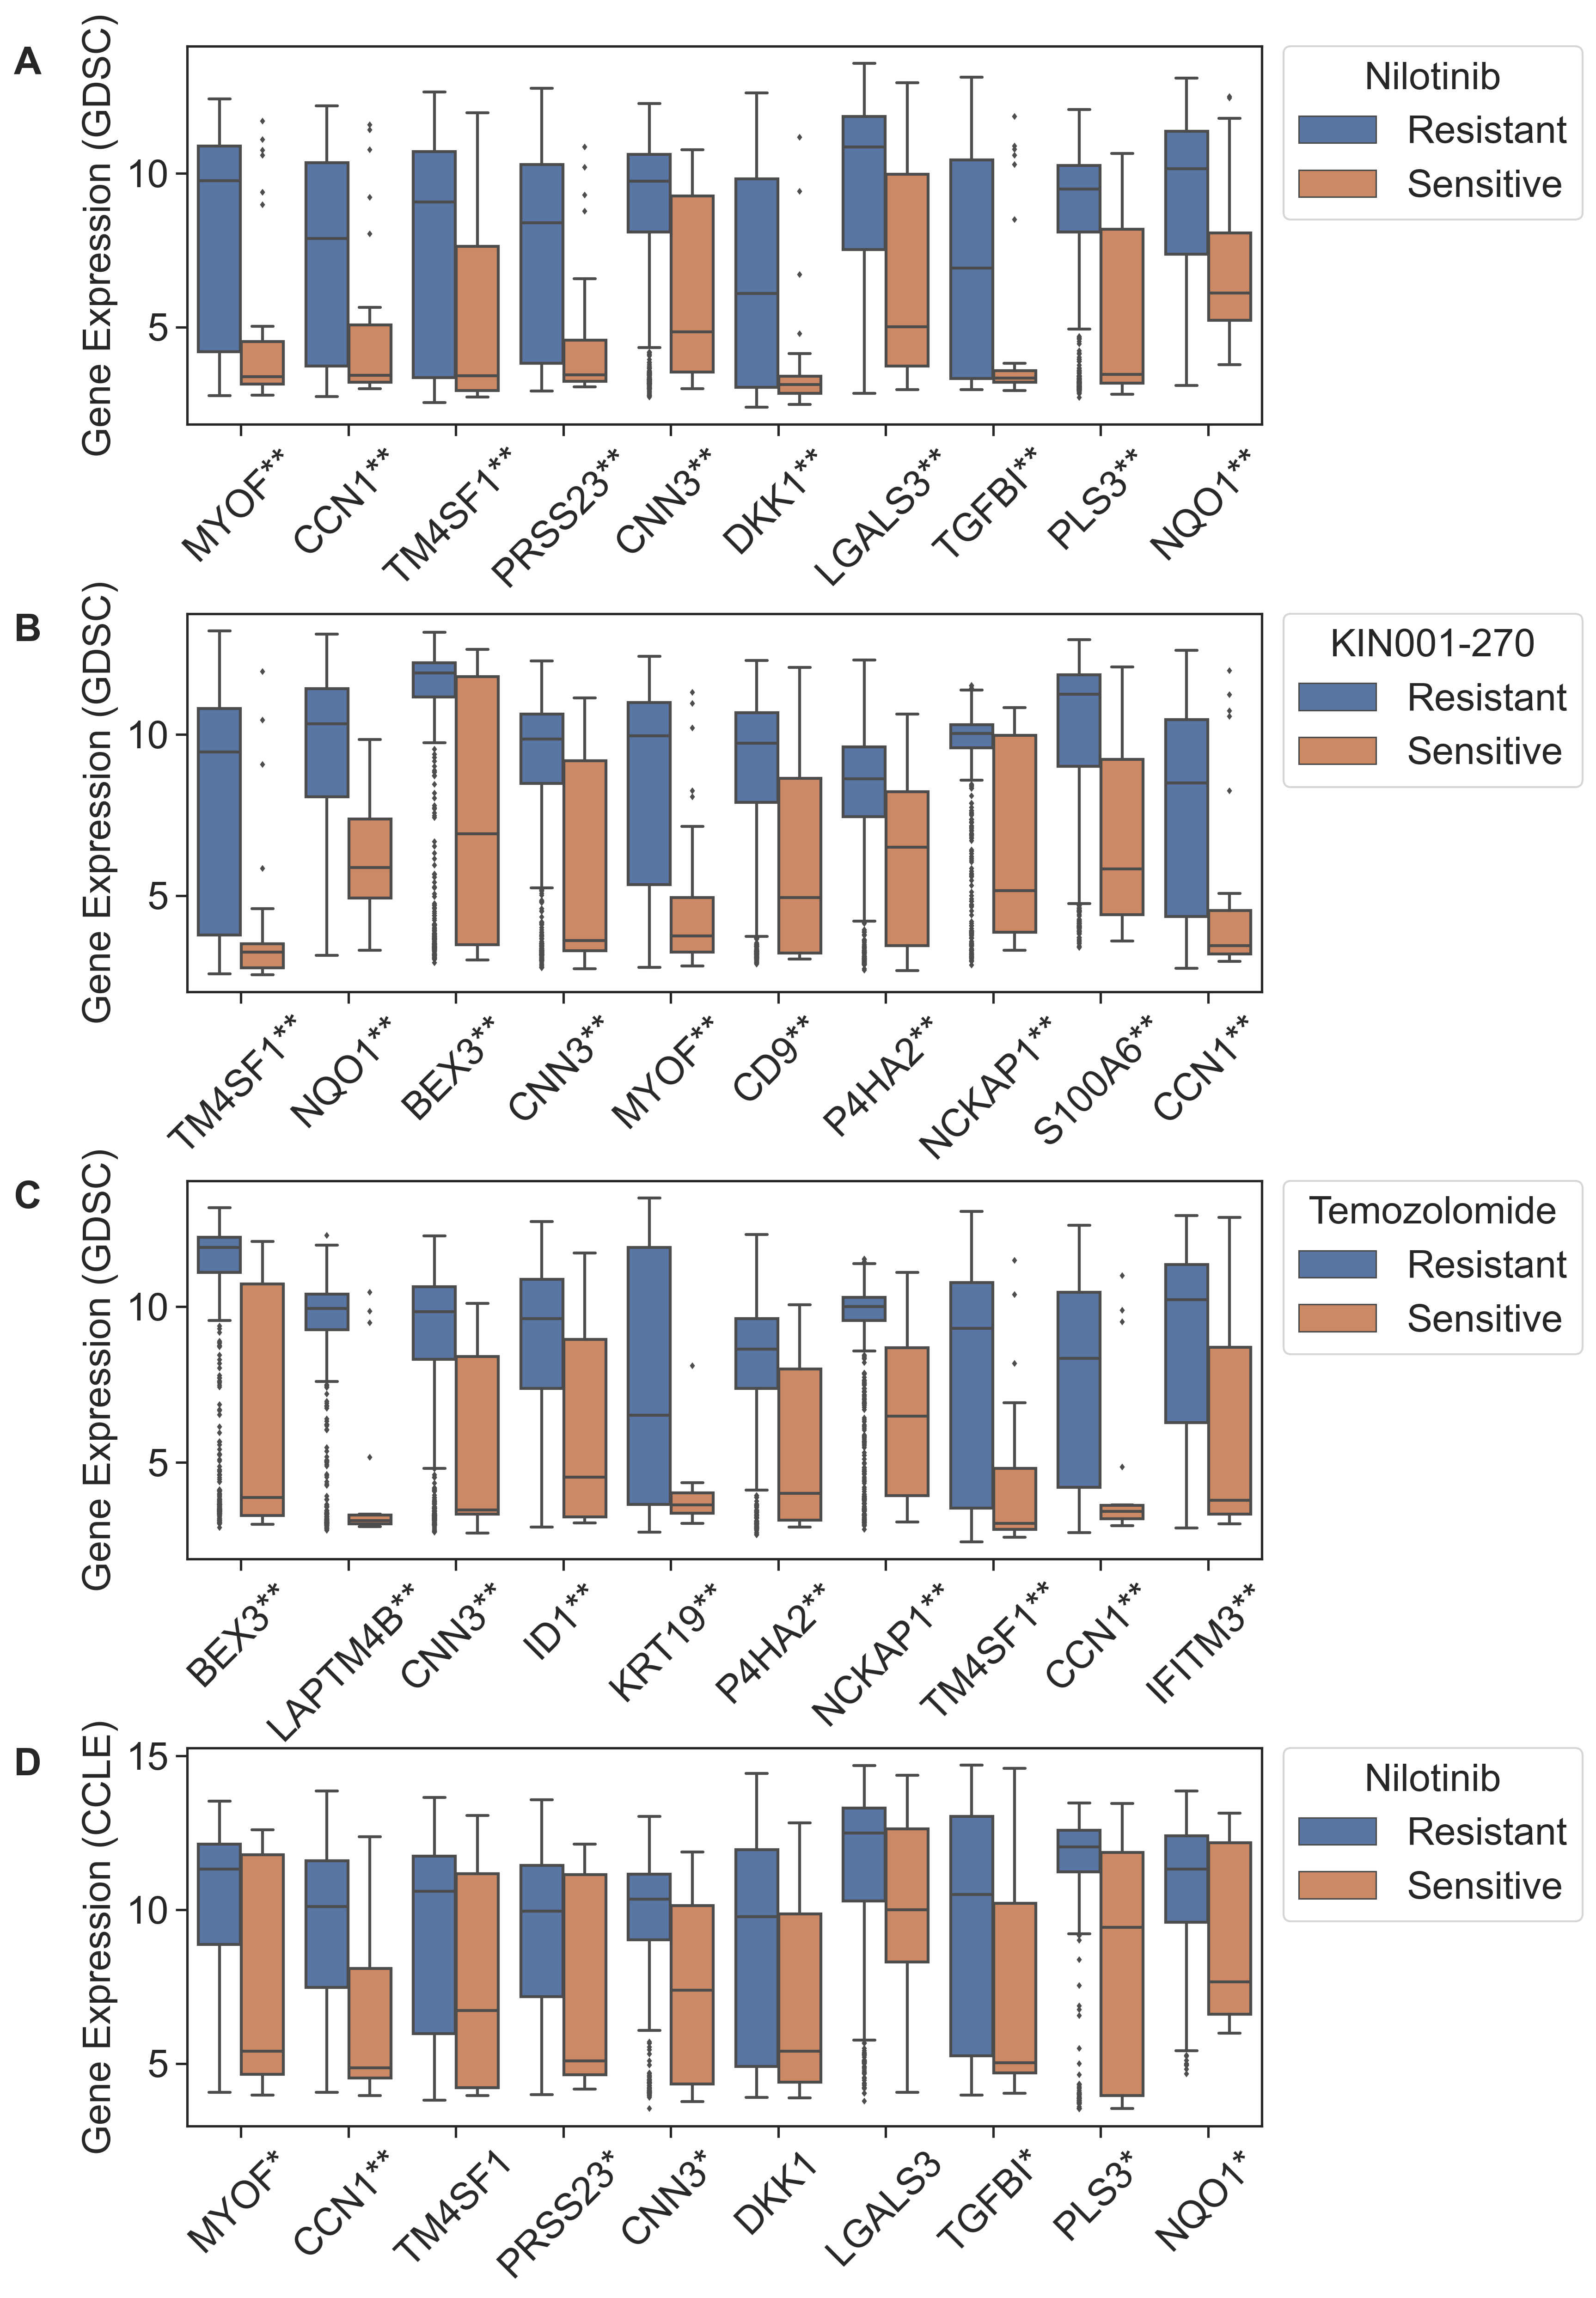

In [38]:
params = {
   'axes.labelsize': 20,
   'font.size': 20,
   'legend.fontsize': 20,
   'legend.title_fontsize': 20,
   'xtick.labelsize': 20,
   'ytick.labelsize': 20,
   'text.usetex': False,
   'figure.figsize': [10,20]
   }
rcParams.update(params)

plt.subplots_adjust(left=0.125, bottom=0.05, right=0.9, top=0.8, wspace=0.2, hspace=0.5)
plt.subplot(4, 1, 1)
plot_top_10_genes('Nilotinib', 'A')
plt.subplot(4, 1, 2)
plot_top_10_genes('KIN001-270', 'B')
plt.subplot(4, 1, 3)
plot_top_10_genes('Temozolomide', 'C')
plt.subplot(4, 1, 4)
plot_gene_exp_CCLE('Nilotinib', 'D')

#plt.savefig("../analysis_output/figure4_biomarkers.png", bbox_inches='tight');